# Major Power Outages in the United States

## Summary of Findings

### Introduction
The dataset records all power outages that happened from year 2000 to year 2016 within the United States. It contains information related to the power outage (cause, duration and extent of event) as well as characteristics of the region where the event took place (climate condition, climate region, regional electricity consumption, economic characteristics and land-use characteristics).

In this project, we will investigate the location and time the major power outages tend to occur. Our motivating question here is: where and when do major power outages tend to occur? To answer this question, we will focus on the columns containing information about the power outages and regional climate.

### Cleaning and EDA
Firstly, we combined the outage start date and time columns, as well as the outage restoration date and time columns, making them a pd.Timestamp column each. We then extracted the hour of the start time and categorize them by time in a day, i.e. morning, afternoon, night etc. By doing so, we could perform an aggregate analysis on the time when each power outage occured.

Secondly, we labelled each power outage by its impact. As defined by the Department of Energy, a major outage is one that impacted at least 50,000 customers or caused an unplanned firm load loss (peak demand loss) of at least 300 MW. That said, we created a new column called "MAJOR.OUTAGE" that will label a major power outage as True and False the otherwise.

On a side note, there may have been one data entry mistake in the column "NERC.REGION" where the state Florida was labelled as "FRCC, SERC" in exactly one cell when it should have been "FRCC". We manually corrected that in our data cleaning stage.

In our exploratory data analysis (EDA), we focused on investigating the major power outages. 
From the bar chart, the major power outages occured mostly during afternoons as compared to all other times in a day.

<img src="ss2.JPG" width="500"> From the bar chart, the major power outages occured mostly during June, July and August.
<img src="ss3.JPG" width="700"> The boxplot shows that major power outages caused by fuel supply emergency and severe weather lasted longer than others. Additionally, a pivot table is created to show the difference in average duration of outage in different regions based on the cause of outage.

To further investigate the states within each region, we grouped regions and states to observe the total number of outages in each state and its average duration. We found that the state California (WECC) had the most number of major outages during 2020 to 2016 while the state Wisconsin (MRO/RFC), on average, had the longest major outage duration.

To visualize the distribution of number of outages in the U.S. states, Folium was used together with an online US state json file. Below is the distribution of power outages in the U.S.
<img src="ss4.JPG" width="500">


### Assessment of Missingness
As we define a major/non-major power outage based on the number of customers affected ("CUSTOMERS.AFFECTED") and the amount of peak demand lost ("DEMAND.LOSS.MW"), the missingness of values in these two columns would significantly affect our analysis of major/non-major power outage. Unfortunately, both columns have significant amount of missing values - 28.9% of values are missing in "CUSTOMERS.AFFECTED" and 46.0% of values are missing in "DEMAND.LOSS.MW".

#### Addressing MNAR
The missing values in the column "DEMAND.LOSS.MW", which describes the amount of peak demand loss during an outage event, could be missing not at random (MNAR). Based on the National Grid, measuring electricity demand is different from electicity consumption and a demand meter is used to measure electricity demand. However, not all buildings or households have a demand meter because it will only be installed when the average consumption exceeds a threshold over a consecutive period of time. Furthermore, it requires a person to manually read the demand meter to get the peak demand readings. Thus, the missing values in the column could be due to the lack of manpower to record the peak demand readings at each building and the lack of demand meters - these factors were not reflected in any other columns of the table.

An additional data that can potentially explain the missingness in the column "DEMAND.LOSS.MW" is the number of staffs stationed at the power station during an power outage. An hypothesis is that he more the working staffs at a power station, the more the data could be captured manually by the staffs. Another additional data that can be useful is the number of demand meter installed locally.

#### Addressing MAR
We believed that the missingness in the column "CUSTOMERS.AFFECTED" is MAR as it could be dependent on the duration of outage (the longer the outage, the greater the impact). To test for MAR, we considered the columns "OUTAGE.DURATION", "CAUSE.CATEGORY" and "CLIMATE.CATEGORY". A total of three permutation tests was conducted at a 5% significance level. In each permutation test, we would permutate the values of the column named "MAJOR.OUTAGE" that contained boolean values True (major outage) or False (non-major outage) - created in the data cleaning stage. Then, we would compare the distribution of all simulated test statistics and the observed TVD to calculate a p-value and make a conclusion.

In the first permutation test, our null hypothesis was that the missingness in "Customers Affected" does not depend on "Outage Duration" while our alternative hypothesis was that the missingness in "Customers Affected" depends on "Outage Duration". Our p-value was 0.032. Since the p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the missingness of customers affected is independent on the duration of outage.

In the second permutation test, our null hypothesis was that the missingness in "Customers Affected" does not depend on "Cause Category" while our alternative hypothesis was that the missingness in "Customers Affected" depends on "Cause Category". Our p-value was 0.0. Since the p-value is less than the 5% significance level (0.05), the null hypothesis is rejected. There is insufficient evidence to conclude that the missingness of customers affected is independent of the cause of outage.

In the second permutation test, our null hypothesis was that the missingness in "Customers Affected" does not depend on "Climate Category" while our alternative hypothesis was that the missingness in "Customers Affected" depends on "Climate Category". Our p-value was 0.336. Since p-value is more than the 5% significance level, we fail to reject the null hypothesis that the missingness of customers affected is not dependent on the climate category

#### Conclusion of Missingness
The missingness in the column "DEMAND.LOSS.MW" is likely to be MNAR while the missingness in the column "CUSTOMERS.AFFECTED" is MAR. Given the significant amount of missingness in these two columns, it would largely affect our analysis on major outages because any event with missing values in both variables would be categorized as a "non-major power outage". This would potentially lead us to overestimate the number of non-major outages and underestimate the number of major outages. Furthermore, it would also affect our final test in this project that determines the location and time that a major outage event is likely to occur at. 

### Hypothesis Test
To investigate the location and time that major outages tend to happen in, we conducted multiple permutation tests. The columns that we used were "MAJOR.OUTAGE" (whether an outage was a major or non-major event), "NERC.REGION" (region of each event), "MONTH" and "TIME_IN_DAY" (the time in a day when an event occured). We used permutation test to find out whether the distributions of region/time that major events are different from that of non-major events. This was done by permutating the column "MAJOR.OUTAGE" and calculating TVD. Each permutation test was conducted at the 5% significance level. 

Describe the setup and results of your hypothesis test. Make sure to explicitly state your null and alternative hypotheses, test statistic, the significance level you used, and what conclusions you can draw from the results.

#### Permutation test 1: NERC REGION
Null Hypothesis: Amongst all power outages between 2000 to 2016, the region distribution of major outages is the same as that of non-major outages in the US

Alternative Hypothesis: In the US, the region distributions of major and non-major outages are different.

Observed Total Variation Distance (TVD) = 0.26
<img src="ss5.JPG" width="500"> The p-value was 0.0. Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the region distributions of major and non-major outages in the US are the same.

#### Permutation test 2: MONTH
Null Hypothesis: The months that major and non-major outages happened in follow the same distribution

Alternative Hypothesis: The distribution of months that major and non-major outages happened are different.

Observed Total Variation Distance (TVD) = 0.26
<img src="ss6.JPG" width="500"> The p-value was 0.006. Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the months that major and non-major outages happened in follow the same distribution.

#### Permutation test 3: TIME IN DAY
Null Hypothesis: The time that major and non-major outages happened in follow the same distribution

Alternative Hypothesis: The distribution of time that major and non-major outages happened in are different.

Observed Total Variation Distance (TVD) = 0.26
<img src="ss7.JPG" width="500"> The p-value was 0.0. Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the time that major and non-major outages happened in follow the same distribution.

### Conclusion
In conclusion, major outages are more likely to occur in RFC, WECC and SERC regions. They are also more likely to happen in the month of June, July and August. Last but not least, they are likely to happen in the afternoon. As each test is conducted independently, we cannot draw relationships between the region, month and time. In other words, we could not conclude that major outages tend to happen in RFC, WECC and SERC regions within those three months during afternoon time.

A potential improvement of this project would definitely be imputing the missing values in the columns "Customers Affected" and "Demand Loss MW". To impute the missing values in "Customers Affected", we could use the columns "Outage Duration" and local population. Meanwhile, we could use some additional data such as history of peak demand by different time in a day to impute the missing values in "Demand Loss MW". Another potential improvement would be to further drill down to investigate by zip codes in each state.

## Code

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import folium
from IPython.display import Image

### Cleaning and EDA

We will first clean the data by combining and dropping repeating/redundant columns. To identify major outages, we will create a new column named "MAJOR.OUTAGE" that takes the value True if an event is a major outage and False the otherwise

In [68]:
#get data
df_ori = pd.read_csv('outage.csv')

#drop OBS (observation) column
df = df_ori.drop(columns='OBS')

#combining start date & time and restoration date & time
df['OUTAGE.START.DATE.TIME'] = pd.to_datetime(df['OUTAGE.START.DATE'] + ", " + df['OUTAGE.START.TIME'])
df['OUTAGE.RESTORATION.DATE.TIME'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'] + ", " + df['OUTAGE.RESTORATION.TIME'])

#dropping original columns of start date & time and restoration date & time
df = df.drop(columns=['OUTAGE.START.DATE','OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'])

#there's a false input in NERC.REGION
df.loc[:, 'NERC.REGION'].replace('FRCC, SERC', 'FRCC', inplace=True)

#adding a "Major Outage" column to identify major outages (affected over 50,000 customers or over 300MW of demand loss)
df['MAJOR.OUTAGE'] = (df['CUSTOMERS.AFFECTED'] >= 50_000) | (df['DEMAND.LOSS.MW'] >= 300)

To label each hour by the time in a day, we will first create a dictionary

In [82]:
time_in_day = {
    0:'midnight',
    1:'mid of the night',
    2:'mid of the night',
    3:'early morning',
    4:'early morning',
    5:'early morning',
    6:'morning',
    7:'morning',
    8:'morning',
    9:'late morning',
    10:'late morning',
    11:'late morning',
    12:'noon',
    13:'early afternoon',
    14:'early afternoon',
    15:'early afternoon',
    16:'late afternoon',
    17:'late afternoon',
    18:'late afternoon',
    19:'evening',
    20:'evening',
    21:'evening',
    22:'night',
    23:'night'
}

Here we will create a smaller table from the original copy to only show the time and date of the outages. Then, we will plot a few graphs to see the distribution of time and month of major outages

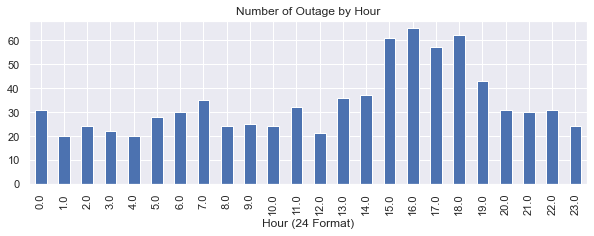

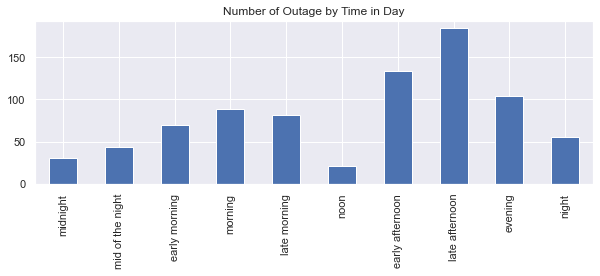

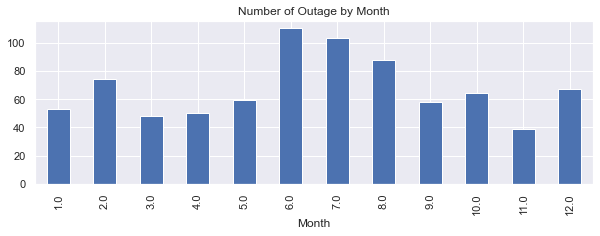

In [72]:
#create buckets for outage time
date_time_occur = df.copy()[['YEAR', 'MONTH', 'OUTAGE.START.DATE.TIME', 'OUTAGE.RESTORATION.DATE.TIME', 'MAJOR.OUTAGE']]
date_time_occur['HOUR'] = date_time_occur['OUTAGE.START.DATE.TIME'].dt.hour
date_time_occur['TIME_IN_DAY'] = date_time_occur['HOUR'].map(time_in_day)
date_time_occur['QUARTER'] = date_time_occur['MONTH'].map(quarter)

#getting only the data of major outages
#visualizing the time and month of major outages
date_time_occur_major = date_time_occur.loc[date_time_occur['MAJOR.OUTAGE']]

f = plt.figure(1)
date_time_occur_major['HOUR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour (24 Format)')
plt.title('Number of Outage by Hour')

g = plt.figure(2)
order=['midnight', 'mid of the night', 'early morning', 'morning', 'late morning', 'noon', 'early afternoon', 'late afternoon', 'evening', 'night']
date_time_occur_major['TIME_IN_DAY'].value_counts().loc[order].plot(kind='bar')
plt.title('Number of Outage by Time in Day')

h = plt.figure(3)
date_time_occur_major['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.title('Number of Outage by Month')

plt.show()

Here we will see the duration of major outages based on various causes

[Text(0.5, 1.0, 'Outage Duration by Cause Category')]

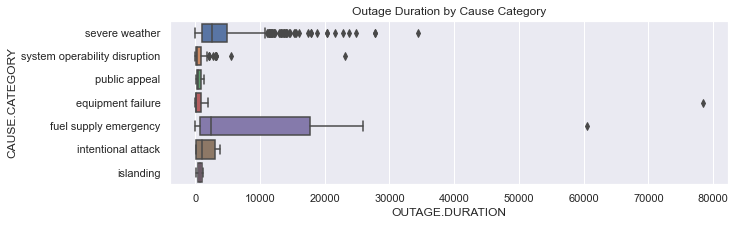

In [69]:
#getting only the data of major outages
major_outages = df.loc[df['MAJOR.OUTAGE']]
sns.set(rc = {'figure.figsize':(10,3)})
sns.boxplot(data=major_outages, x='OUTAGE.DURATION', y='CAUSE.CATEGORY', orient='h').set(title='Outage Duration by Cause Category')

Here we will see the average duration of major outages in each region based on different causes

In [6]:
#create a pivot table to observe the number of outage in each region by time in a day
date_time_occur['NERC.REGION'] = major_outages['NERC.REGION']
date_time_occur['CAUSE.CATEGORY'] = major_outages['CAUSE.CATEGORY']
date_time_occur['OUTAGE.DURATION'] = major_outages['OUTAGE.DURATION']
pd.pivot_table(date_time_occur, index='NERC.REGION', values='OUTAGE.DURATION', columns='CAUSE.CATEGORY', aggfunc='mean', fill_value=0).head()

CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
NERC.REGION,,,,,,,
ECAR,0.0,0.0,0,0,0.0,6035.142857,2960.666667
FRCC,182.0,0.0,0,0,0.0,5464.777778,93.500000
HECO,0.0,0.0,0,0,0.0,1224.500000,0.000000
HI,0.0,0.0,0,0,0.0,1367.000000,0.000000
MRO,0.0,0.0,0,181,0.0,3376.600000,0.000000


Here we will see the total number of major outages and average duration of major outages in each region & state

In [73]:
#check the number of outages and the average duration of outages by region
#group by NERC.REGION and the relevant states
major_outages.groupby(['NERC.REGION', 'U.S._STATE']).agg({'YEAR':'count', 'OUTAGE.DURATION':'mean'}).rename(columns={'YEAR':'COUNT', 'OUTAGE.DURATION':'OUTAGE.DURATION.MEAN'}).head()

COUNT  OUTAGE.DURATION.MEAN
NERC.REGION U.S._STATE                             
ECAR        Arkansas        1            126.000000
            Indiana         3          10600.000000
            Louisiana       2           7147.000000
            Michigan       18           5083.555556
            Ohio            7           6293.857143

Here we will create a table that shows the total number of major outages and average duration of major outages in each state. We will later use this table to create a Folium choropleth to visualize the severity of major outages in the US

In [85]:
#use groupby to check the number of outages and average outage duration in each state 
grouped = major_outages.groupby('U.S._STATE').agg({'YEAR':'count', 'OUTAGE.DURATION':'mean'})
grouped.columns = ['OUTAGE.COUNT', 'OUTAGE.DURATION.AVERAGE']
grouped = grouped.reset_index()

#plotting number of major outages in each state on US map using Folium
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json" #getting US states json online
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(geo_data=state_geo, 
                  name='choropleth', 
                  data=grouped, 
                  columns=['U.S._STATE', 'OUTAGE.COUNT'], 
                  key_on='feature.properties.name',
                  fill_color="YlGn",
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Number of Power Outage",
                 ).add_to(m)
folium.LayerControl().add_to(m)
m

### Assessment of Missingness

Here we will check the top five columns in terms of missingness

In [84]:
#check missing values in each column
df.isna().mean().sort_values(ascending=False).head()

HURRICANE.NAMES                 0.953064
DEMAND.LOSS.MW                  0.459583
CAUSE.CATEGORY.DETAIL           0.307040
CUSTOMERS.AFFECTED              0.288787
OUTAGE.RESTORATION.DATE.TIME    0.037810
dtype: float64

The missing values in the column "HURRICANE.NAMES" are Missing by Design (MD) since we could easily tell based on the description in the column named "CAUSE.CATEGORY". 

Missing values in the column "DEMAND.LOSS.MW" are likely missing not at random (MNAR) as explained in the Summary section.

We will now use a permutation test to test if the missing values in "CUSTOMERS.AFFECTED" are MAR dependent on the duration of outage ("OUTAGE.DURATION") and/or the cause of the outage ("CAUSE.CATEGORY"). In this test, we will use the original dataset that contains all major and minor power outages

c_missing
False    2845.513258
True     2071.966667
Name: OUTAGE.DURATION, dtype: float64

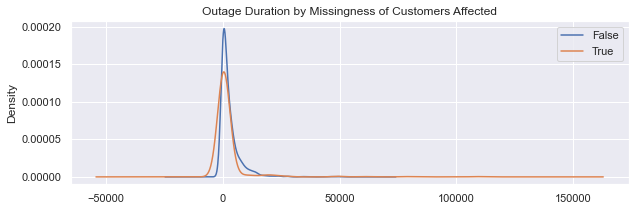

In [11]:
#getting only the columns that we will test
missing_test_df = df_ori.copy()[['CUSTOMERS.AFFECTED', 'OUTAGE.DURATION', 'CAUSE.CATEGORY', 'CLIMATE.CATEGORY']]
missing_test_df['c_missing'] = missing_test_df['CUSTOMERS.AFFECTED'].isna()
missing_test_df.groupby('c_missing')['OUTAGE.DURATION'].plot(kind='kde', legend=True, title='Outage Duration by Missingness of Customers Affected')
missing_test_df.groupby('c_missing')['OUTAGE.DURATION'].mean()

#### Permutation test (CUSTOMERS.AFFECTED vs OUTAGE.DURATION) at 5% significance level
Null Hypothesis: Missingness in "Customers Affected" does not depend on "Outage Duration"

Alternative Hypothesis: Missingness in "Customers Affected" depends on "Outage Duration"

P-value of permutation test: 0.032


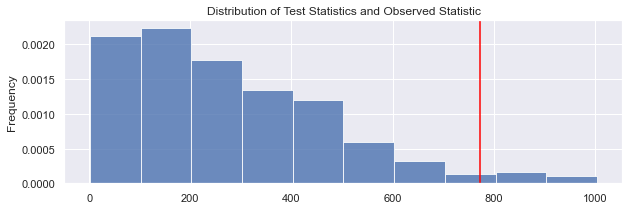

In [12]:
#observed statistic
obs = abs(missing_test_df.groupby('c_missing')['OUTAGE.DURATION'].mean().diff().iloc[-1])

#simulation
test = []
shuffled = missing_test_df.copy()
for _ in range(500):
    shuffled['c_missing'] = np.random.permutation(shuffled['c_missing'])
    t = abs(shuffled.groupby('c_missing')['OUTAGE.DURATION'].mean().diff().iloc[-1])
    test.append(t)

#visualize
pd.Series(test).plot(kind='hist', density=True, alpha=0.8, title='Distribution of Test Statistics and Observed Statistic')
plt.axvline(obs, 0, color='red')

#calculating p-value
pval = (test >= obs).mean()
print("P-value of permutation test:", pval)

Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the missingness of customers affected is independent on the duration of outage.

#### Permutation test (CUSTOMERS.AFFECTED vs CAUSE.CATEGORY) at 5% significance level
Null Hypothesis: Missingness in "Customers Affected" does not depend on "Cause Category"

Alternative Hypothesis: Missingness in "Customers Affected" depends on "Cause Category"

<AxesSubplot:title={'center':'Cause of Outage by Missingness of Customers Affected'}, ylabel='CAUSE.CATEGORY'>

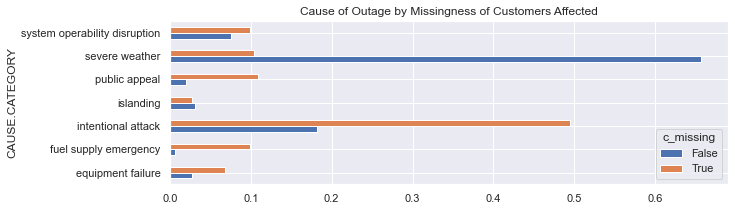

In [13]:
#construct a pivot table to check the missing proportion across different cause categories
cause_dist = missing_test_df.pivot_table(index='CAUSE.CATEGORY', columns='c_missing', aggfunc='size').apply(lambda x:x/x.sum())
cause_dist.plot(kind='barh', title='Cause of Outage by Missingness of Customers Affected')

P-value is:  0.0


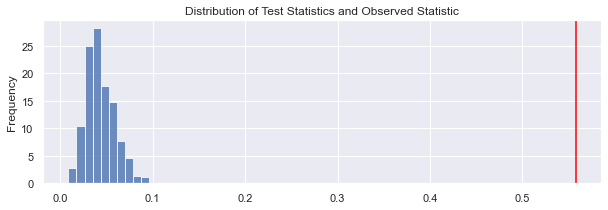

In [14]:
#observed statistic (tvd)
obs2 = cause_dist.diff(axis=1).iloc[:, -1].abs().sum()/2

#simulation
tvds = []
shuffled = missing_test_df.copy()
for _ in range(500):
    shuffled['c_missing'] = np.random.permutation(shuffled['c_missing'])
    d = shuffled.pivot_table(index='CAUSE.CATEGORY', columns='c_missing', aggfunc='size').apply(lambda x: x/x.sum())
    t = d.diff(axis=1).iloc[:, -1].abs().sum()/2
    tvds.append(t)

#visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Distribution of Test Statistics and Observed Statistic')
plt.axvline(obs2, 0, color='red')

#calculate p-value
pval = (tvds >= obs2).mean()
print('P-value is: ', pval)

Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the missingness of customers affected is independent on the cause category.

#### Permutation test (CUSTOMERS.AFFECTED vs CLIMATE.CATEGORY) at 5% significance level
Null Hypothesis: Missingness in "Customers Affected" does not depend on "Climate Category"

Alternative Hypothesis: Missingness in "Customers Affected" depends on "Climate Category"

<AxesSubplot:title={'center':'Climate Category by Missingness of Customers Affected'}, ylabel='CLIMATE.CATEGORY'>

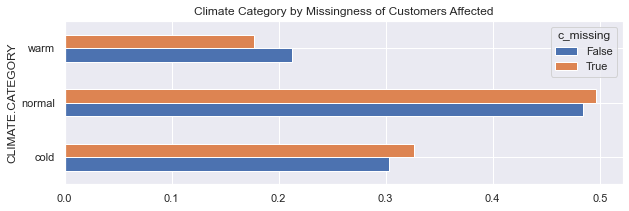

In [15]:
climate_dist = missing_test_df.pivot_table(index='CLIMATE.CATEGORY', columns='c_missing', aggfunc='size').apply(lambda x:x/x.sum())
climate_dist.plot(kind='barh', legend=True, title='Climate Category by Missingness of Customers Affected')

P-value is:  0.336


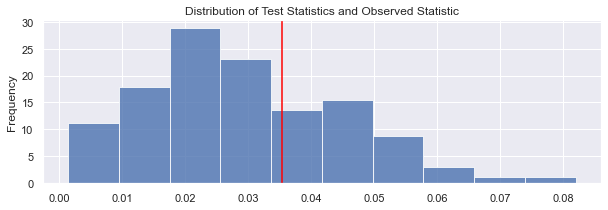

In [16]:
#observed statistic
obs3 = climate_dist.diff(axis=1).iloc[:, -1].abs().sum()/2

#simulation
tvds = []
shuffled = missing_test_df.copy()
for _ in range(500):
    shuffled['c_missing'] = np.random.permutation(shuffled['c_missing'])
    d = shuffled.pivot_table(index='CLIMATE.CATEGORY', columns='c_missing', aggfunc='size').apply(lambda x: x/x.sum())
    t = d.diff(axis=1).iloc[:, -1].abs().sum()/2
    tvds.append(t)

#visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Distribution of Test Statistics and Observed Statistic')
plt.axvline(obs3, color='red')

#calculate p-value
pval = (tvds >= obs3).mean()
print('P-value is: ', pval)

Since p-value is more than the 5% significance level, we fail to reject the null hypothesis that the missingness of customers affected is not dependent on the climate category

### Hypothesis Testing

#### Permutation test: Occurence by Region

In our EDA, we found that major outages mainly occur in RFC, WECC and SERC regions. Do major outages tend to occur in these regions? In other words, we want to test if the non-major outages follow the same region distribution.

Null Hypothesis: Amongst all power outages between 2000 to 2016, the region distribution of major outages is the same as that of non-major outages in the US

Alternative Hypothesis: In the US, the region distributions of major and non-major outages are different.

To test the hypothesis, we will conduct permutation test with 95% confidence level

P-value is:  0.0


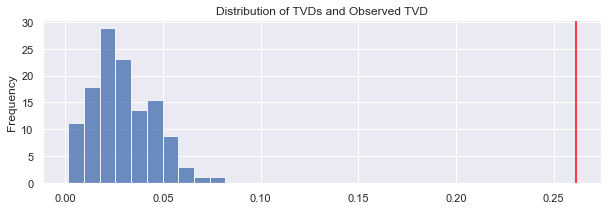

In [46]:
#observed statistics
reg_dist = df.pivot_table(index='NERC.REGION', columns='MAJOR.OUTAGE', aggfunc='size', fill_value=0).apply(lambda x: x/x.sum())
obs4 = reg_dist.diff(axis=1).iloc[:, -1].abs().sum()/2

#simulation
tvds2 = []
df_test = df.copy()[['NERC.REGION', 'MAJOR.OUTAGE']]
for _ in range(500):
    df_test['MAJOR.OUTAGE'] = np.random.permutation(df_test['MAJOR.OUTAGE'])
    d = df_test.pivot_table(index='NERC.REGION', columns='MAJOR.OUTAGE', aggfunc='size', fill_value=0).apply(lambda x: x/x.sum())
    t = d.diff(axis=1).iloc[:, -1].abs().sum()/2
    tvds2.append(t)

#visualize distribution of test statictics and observed statistics
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Distribution of TVDs and Observed TVD')
plt.axvline(obs4, color='red')

#calculate p-value
pval = (tvds2 >= obs4).mean()
print('P-value is: ', pval)

Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the region distributions of major and non-major outages in the US are the same.

#### Permutation test: Occurence by Month

In our EDA, we also found that major outages mostly happened during June, July and August. We would like to test if the non-major outages also follow the same distribution.

Null Hypothesis: The months that major and non-major outages happened in follow the same distribution

Alternative Hypothesis: The distribution of months that major and non-major outages happened are different.

To test the hypothesis, we will conduct permutation test with 95% confidence level

P-value is:  0.006


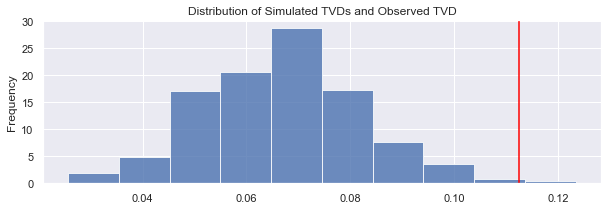

In [57]:
#observed statistics
obs5 = date_time_occur.pivot_table(index='MONTH', columns='MAJOR.OUTAGE', aggfunc='size').apply(lambda x: x/x.sum()).diff(axis=1).iloc[:, -1].abs().sum()/2

#simulation
tvds3 = []
df_test = date_time_occur.copy()[['MONTH', 'MAJOR.OUTAGE']]
for _ in range(500):
    df_test['MAJOR.OUTAGE'] = np.random.permutation(df_test['MAJOR.OUTAGE'])
    t = df_test.pivot_table(index='MONTH', columns=['MAJOR.OUTAGE'], aggfunc='size').apply(lambda x: x/x.sum()).diff(axis=1).iloc[:, -1].abs().sum()/2
    tvds3.append(t)

#visualize
pd.Series(tvds3).plot(kind='hist', alpha=0.8, density=True, title='Distribution of Simulated TVDs and Observed TVD')
plt.axvline(obs5, color='red')

#p-value
pval = (tvds3>=obs5).mean()
print('P-value is: ', pval)

Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the months that major and non-major outages happened in follow the same distribution.

#### Permutation test: Occurence by Time

In our EDA, we also found that major outages mostly happened during afternoon. We would like to test if the non-major outages also follow the same distribution.

Null Hypothesis: The time that major and non-major outages happened in follow the same distribution

Alternative Hypothesis: The distribution of time that major and non-major outages happened in are different.

To test the hypothesis, we will conduct permutation test with 95% confidence level

P-value is:  0.0


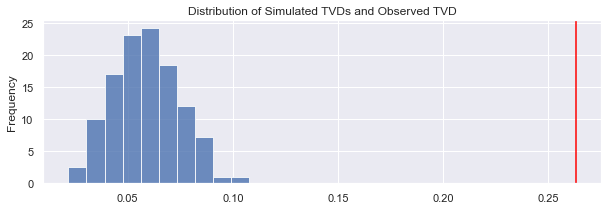

In [59]:
#observed statistics
obs6 = date_time_occur.pivot_table(index='TIME_IN_DAY', columns='MAJOR.OUTAGE', aggfunc='size').apply(lambda x: x/x.sum()).diff(axis=1).iloc[:, -1].abs().sum()/2

#simulation
tvds4 = []
df_test = date_time_occur.copy()[['TIME_IN_DAY', 'MAJOR.OUTAGE']]
for _ in range(500):
    df_test['MAJOR.OUTAGE'] = np.random.permutation(df_test['MAJOR.OUTAGE'])
    t = df_test.pivot_table(index='TIME_IN_DAY', columns=['MAJOR.OUTAGE'], aggfunc='size').apply(lambda x: x/x.sum()).diff(axis=1).iloc[:, -1].abs().sum()/2
    tvds4.append(t)

#visualize
pd.Series(tvds4).plot(kind='hist', alpha=0.8, density=True, title='Distribution of Simulated TVDs and Observed TVD')
plt.axvline(obs6, color='red')

#p-value
pval = (tvds4>=obs6).mean()
print('P-value is: ', pval)

Since p-value is less than the 5% significance level, the null hypothesis is rejected. There is insufficient evidence to conclude that the time that major and non-major outages happened in follow the same distribution.